In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Global Variables

* https://www.marketwatch.com/tools/top-25-etfs
* https://elib.suub.uni-bremen.de/publications/dissertations/E-Diss549_diss02.pdf

In [3]:
ETF = [
    'VOO',
    'QQQ',
    'SPY',
    'IVV',
    'IWD',
]

# Pull Data

In [33]:
df_stock = yf.Ticker("TSLA")\
    .history(period='3y')\
    .reset_index()

In [34]:
df_stock

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-09-16,146.623337,152.596664,145.103333,147.253326,216837900,0,0.0
1,2020-09-17,138.533340,145.929993,136.000000,141.143326,230337600,0,0.0
2,2020-09-18,149.313339,150.333328,142.933334,147.383331,259220400,0,0.0
3,2020-09-21,151.043335,151.893326,135.690002,149.796661,328430400,0,0.0
4,2020-09-22,143.199997,145.919998,139.199997,141.410004,238742400,0,0.0
...,...,...,...,...,...,...,...,...
750,2023-09-11,264.269989,274.850006,260.609985,273.579987,174667900,0,0.0
751,2023-09-12,270.760010,278.390015,266.600006,267.480011,135999900,0,0.0
752,2023-09-13,270.070007,274.980011,268.100006,271.299988,111673700,0,0.0
753,2023-09-14,271.320007,276.709991,270.420013,276.040009,107709800,0,0.0


# Augmented Dickney-Fuller Test

If the adf t statistic is "more negative" than the critical value, we reject the null and accept the alternate hypothesis
* H0: rho = 1 - nonstationary
* H1: rho < 1 - stationary

In [35]:
adf_result = sm.tsa.stattools.adfuller(df_stock['Close'], 1)
t = adf_result[0]
p = adf_result[1]

In [36]:
adf_result

(-2.338525949877143,
 0.15984338246285384,
 0,
 754,
 {'1%': -3.439052522969989,
  '5%': -2.8653808299915013,
  '10%': -2.5688152592363274},
 5505.483470528699)

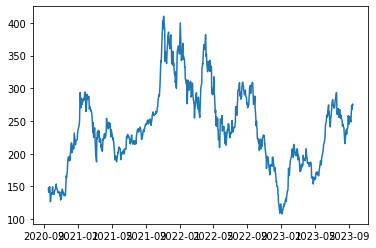

In [37]:
plt.plot(df_stock['Date'], df_stock['Close'])

In [30]:
if p >= 0.05:
    print('Non-Stationary')
else:
    print('Stationary')

Non-Stationary


In [ ]:
# 